In [ ]:
La base est formée de 60 000 données d'apprentissage et de 10 0000 données de test.
Chaque données représente : une image et le chiffre attendu
Chaque images est de taille 28 * 28 pixels
En 256 niveau de gris ( chaque pixel)


In [67]:

# ********** Pour télécharger le jeu de données ***************************

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()




In [57]:


# ************** Préparer les données ******************************


num_classes = 10   # sortie correspondant de 0 à 9
input_shape = (28, 28, 1)  # tableau 28 x 28 de 0 à 255 

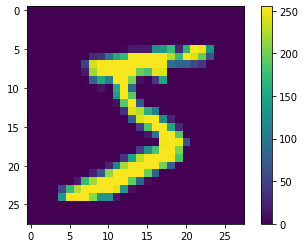

In [62]:

#       Prétraiter les données
#     Les données doivent être prétraitées avant de former le réseau. 
#     Si vous inspectez la première image de l'ensemble d'apprentissage, 
#      vous verrez que les valeurs de pixel se situent dans la plage de 0 à 255 :

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [45]:


# **************************************
#    Convertissez les exemples de données d'entiers en nombres à virgule flottante :
#    Mettez ces valeurs à l'échelle dans une plage de 0 à 1 avant de les alimenter au modèle de réseau neuronal. 
#    Pour ce faire, divisez les valeurs par 255.
#    Il est important que l' ensemble d'apprentissage et
#    l' ensemble de test soient prétraités de la même manière :


x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255


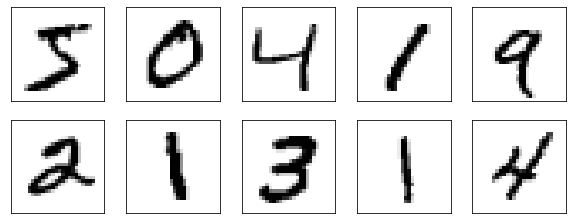

In [82]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    #plt.xlabel(num_classes[y_train[i]])
plt.show()


In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in x_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(num_classes[labels[i]])
    plt.axis("off")


TypeError: 'numpy.uint8' object is not iterable

<Figure size 720x720 with 0 Axes>

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in x_train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(x_train[i], cmap=plt.cm.binary)
        #plt.title(int(labels[i]))
        #plt.axis("off")


TypeError: 'numpy.uint8' object is not iterable

<Figure size 720x720 with 0 Axes>

In [74]:


#  les images sont de la forme (28, 28, 1)


x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [19]:

# ****   Convertir 

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [20]:


# ****************** Construire le model *****************************************



model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

In [22]:

# ********************* Visualisation de l'architecture ***********************

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

In [23]:
batch_size = 128
epochs = 15


model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [ ]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

2022-08-25 21:36:52.928711: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 169344000 exceeds 10% of free system memory.


Epoch 1/15
149/422 [=========>....................] - ETA: 34s - loss: 0.7088 - accuracy: 0.7815

In [ ]:

# *****************************  Evaluation du model *********************************

score = model.evaluate(x_test, y_test, verbose=0)
print("Valeur de l'erreur sur les données de test (loss) " :", score[0])
print("Précision sur les données de test (accuracy) " :", score[1])


In [21]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))


In [6]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [7]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [8]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [11]:
network.fit(train_images, train_labels, epochs=7, batch_size=128)


Epoch 1/7
  4/469 [..............................] - ETA: 9s - loss: 0.0025 - accuracy: 1.0000 

2022-08-25 19:02:47.088173: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


469/469 [==============================] - 5s 11ms/step - loss: 0.0061 - accuracy: 0.9983
Epoch 2/7
469/469 [==============================] - 6s 12ms/step - loss: 0.0051 - accuracy: 0.9989
Epoch 3/7
469/469 [==============================] - 5s 10ms/step - loss: 0.0037 - accuracy: 0.9991
Epoch 4/7
469/469 [==============================] - 5s 11ms/step - loss: 0.0030 - accuracy: 0.9993
Epoch 5/7
469/469 [==============================] - 6s 12ms/step - loss: 0.0022 - accuracy: 0.9994
Epoch 6/7
469/469 [==============================] - 5s 10ms/step - loss: 0.0017 - accuracy: 0.9996
Epoch 7/7
469/469 [==============================] - 5s 11ms/step - loss: 0.0014 - accuracy: 0.9997


In [12]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

2022-08-25 19:03:43.721092: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 2s 4ms/step - loss: 0.0850 - accuracy: 0.9830


In [13]:
print('test_acc:', test_acc)


test_acc: 0.9829999804496765
